In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [49]:
sns.set()
data = pd.read_csv("40VoxelResults.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "f1", "grad", "finished"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data = data.loc[data['errorLimit'] == 15]
data = data.loc[data['nPop'] == 40]
data.drop(['errorLimit'], axis=1, inplace=True)

data800 = pd.read_csv("data.csv", dtype={'time':np.float64})

data800['error'] = [float(x[1:-1]) for x in data800['fbest']]
data800['finished'] = data800['error'] <= 1
data800['time_minutes'] = data800['time'] / 60

data800 = data800.join(data800['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data800.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "f1", "grad", "finished"], axis=1, inplace=True)
    
data800.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data800 = data800.loc[data800['nPop'] == 40]
data800.drop(['errorLimit'], axis=1, inplace=True)

data800.head()

,nPop,error,time_minutes,1,2,3,4,5,6
0,40,14.980791,61.647140,146.033901,793.231973,1240.210643,1382.728491,2113.862258,3234.591546
1,40,16.570683,61.782080,138.877394,801.412701,1205.617236,1278.167789,2230.281552,3343.685514
2,40,15.688471,61.725517,146.971149,806.877263,1239.716075,1359.696550,2162.687297,3407.135999
3,40,16.454564,61.909778,135.660989,802.572158,1169.261336,1330.903938,2176.987146,3200.975874
12,40,15.209553,61.509817,141.697113,803.508354,1206.014369,1362.829475,2185.412385,3199.775596


### Natural frequencies

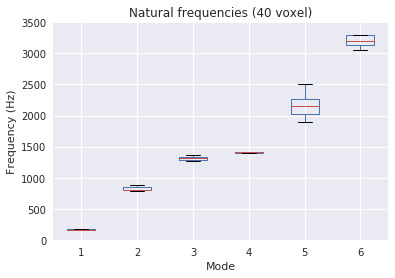

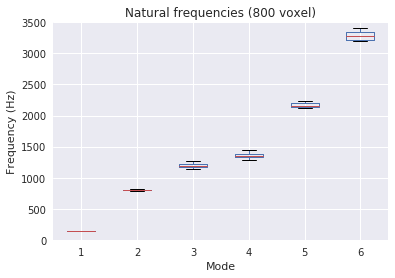

In [50]:
freq = data.drop(['error', 'time_minutes', 'nPop'], axis=1)
freq.boxplot()
plt.title("Natural frequencies (40 voxel)")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.ylim([0, 3500])
plt.show()

freq = data800.drop(['error', 'time_minutes', 'nPop'], axis=1)
freq.boxplot()
plt.title("Natural frequencies (800 voxel)")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.ylim([0, 3500])
plt.show()

In [51]:
dataT = data.drop(['nPop', 'time_minutes', 'error'], axis=1)
dataT["vox"] = 40

dataT800 = data800.drop(['nPop', 'time_minutes', 'error'], axis=1)
dataT800["vox"] = 800

df = pd.concat([dataT, dataT800], axis=0)
df2 = pd.DataFrame()

for i, row in df.iterrows():
    for j in range(1, 7):
        df2 = df2.append(pd.Series([row[j], j, row["vox"]]), ignore_index=True)

df2.columns = ["freq", "mode", "vox"]
df2["error"] = (df2["freq"] - (-400 + df2["mode"]*600)) / (-400 + df2["mode"]*600) * 100
df2["abs_error"] = abs(df2["error"])   
df2["norm_error"] = abs(df2["error"])

error40 = df2.groupby("vox").mean()["abs_error"][40]
error800 = df2.groupby("vox").mean()["abs_error"][800]

df2.loc[df2['vox'] == 40, 'norm_error'] = df2["norm_error"]/error40
df2.loc[df2['vox'] == 800, 'norm_error'] = df2["norm_error"]/error800

[]

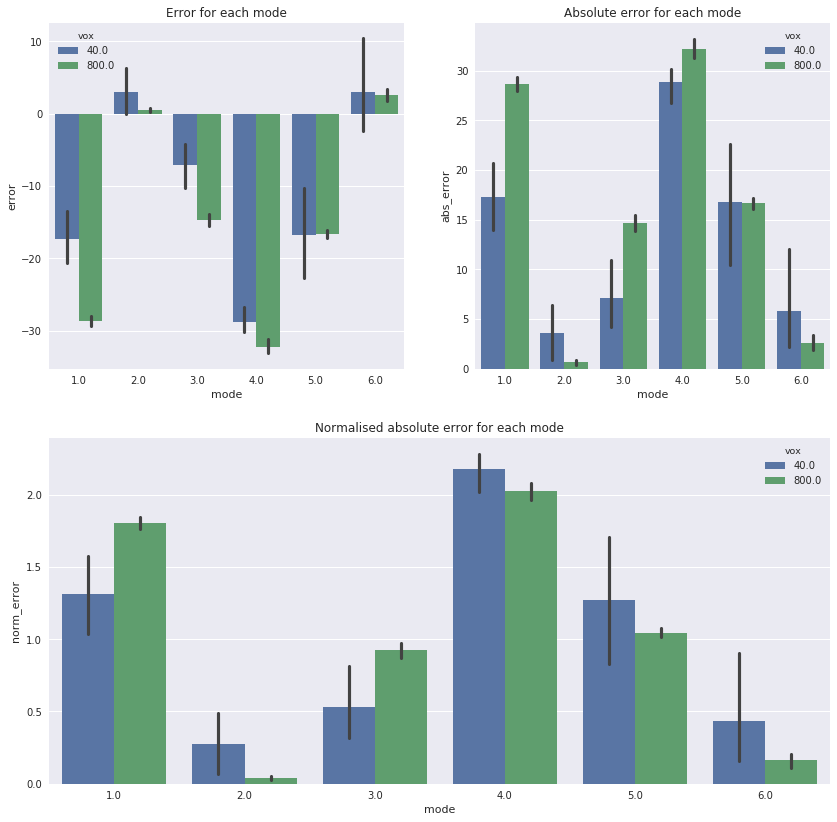

In [53]:
gs = plt.GridSpec(2, 2)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, :])

sns.barplot(x="mode", y="error", hue="vox", data=df2, ax=ax1)
sns.barplot(x="mode", y="abs_error", hue="vox", data=df2, ax=ax2)
sns.barplot(x="mode", y="norm_error", hue="vox", data=df2, ax=ax3)

ax1.set_title("Error for each mode")
ax2.set_title("Absolute error for each mode")
ax3.set_title("Normalised absolute error for each mode")

plt.rcParams["figure.figsize"] = (14, 14)
plt.plot()